In [1]:
import os, sys
import dotenv

import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt

sys.path.append(os.environ.get('PATH_OPENSKY'))
from user_eval import get_df_posts 
from news_outlet_eval import get_news_feed, get_posts_from_nos

dotenv.load_dotenv('.env')    
PATH_DATA = os.environ.get('PATH_OPENSKY') + os.environ.get('PATH_REL_DATA')
PATH_RESAMPLED_SENTIMENTS = os.environ.get('PATH_OPENSKY') + 'results/resampled_sentiments_over_time_3d.csv' 

df = pd.read_csv(PATH_RESAMPLED_SENTIMENTS)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df


,negative,neutral,positive
date,,,
2023-06-28,0.311493,0.395688,0.292820
2023-07-01,0.282494,0.418415,0.299091
2023-07-04,0.282229,0.412418,0.305354
2023-07-07,0.267292,0.413958,0.318750
2023-07-10,0.281818,0.406892,0.311291
...,...,...,...
2024-03-06,0.298343,0.393513,0.308144
2024-03-09,0.281888,0.408833,0.309279
2024-03-12,0.296640,0.409572,0.293788


<Axes: xlabel='date'>

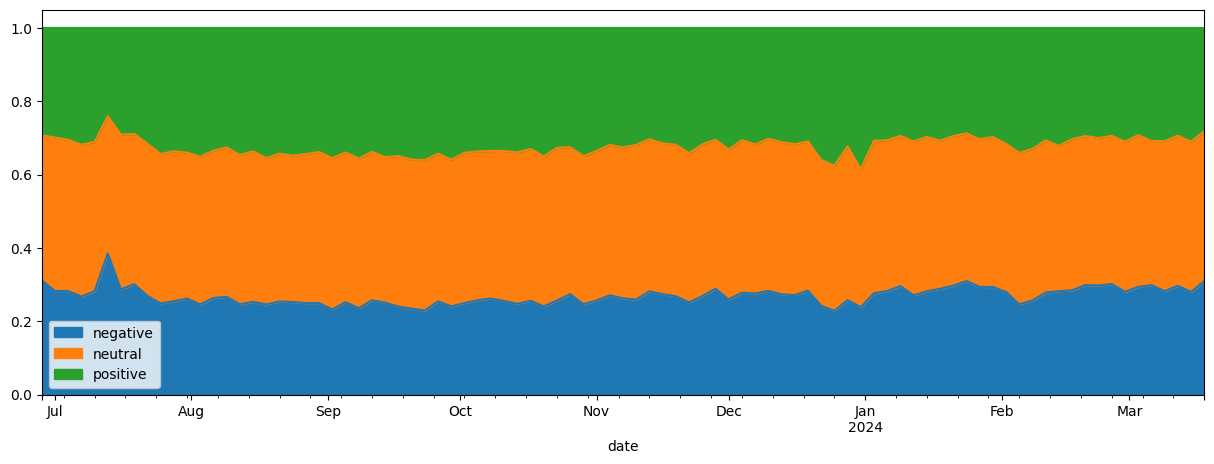

In [2]:
df.plot.area(stacked=True, figsize=(15, 5)) 

(0.0, 0.5)

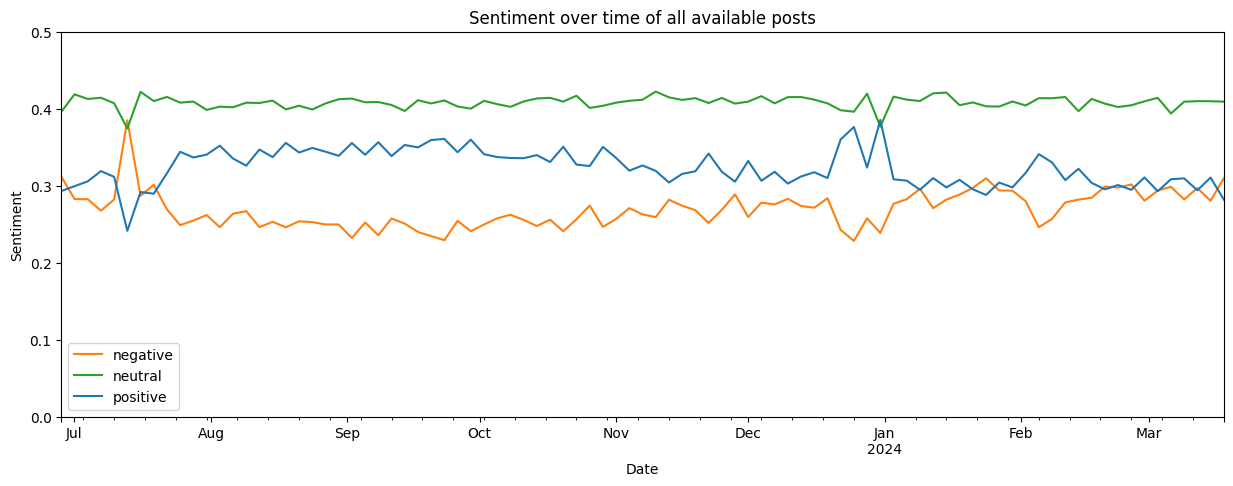

In [3]:
fig, ax = plt.subplots(figsize=(15, 5))
df.plot(ax=ax, color=['#ff7f0e', '#2ca02c', '#1f77b4'])
ax.set_ylabel('Sentiment')
ax.set_xlabel('Date')
ax.set_title('Sentiment over time of all available posts')
ax.set_ylim(0, 0.5)